#### Procesamiento Digital de Señales

# Tarea Semanal 4: Estimacion Espectral

#### Por Gabriel Crisafio

Bibliografia: Holton, capitulo 14

En el Holton se muestra el Analisis Matematico para una senoidal
Veremos el efecto de aplicar una ventana Rectangular y Hamming, desde el punto de vista muestreal y frecuencial

### Ventana Rectangular
![Alt text](Rectangular_Window.jpeg)

### Ventana Hamming
![Alt text](Hamming_Window.jpeg)

## Comparacion de Ventanas
![Alt text](Windows_Spectra.jpeg)

![Alt text](Enunciado_TS4.jpeg)

En esta actividad, generaremos 200 señales senoidales de una frecuencia $\dfrac{f_s}{4} = \dfrac{π}{2} = Ω_0$ a las cuales les sumaremos una señal de ruido uniforme que sigue la siguiente distribucion:

$$ f_r \sim \mathcal{U}(-1/2, \, 1/2) $$

Lo que trataermos de probar es que herramienta nos permite estimar la amplitud de las señales luego de que hayan sido contaminadas con ruido.
El primer estimador consistira en ver que valor toman las senoidales en potencia para una frecuencia de $\dfrac{f_s}{4}$, y hacer la media de las mismas.
El segundo estimador consistira en integrar la potencia de las senoidales en un entorno WBINS cercanos a $\dfrac{f_s}{4}$. Hacemos esto porque al meter la señal de ruido, la energia de la senoidal se "desparrama" y ya no esta concentrada en un delta en su frencuencia.

A cada realizacion le aplicaremos las ventanas vistas: Bartlett, Hann, Blackman y FlatTop. Luego veremos las caracteristicas de cada una al mejorar o empeorar algunos parametros de los estimadores

A continuación visualizaremos el espectro de las senoidales con el ruido aplicado en una escala vertical **logaritmada [dB]**. Podemos notar como, debido a la diferentes ventanas aplicadas, la energia se concentra dentro de la frencuencia elegida.

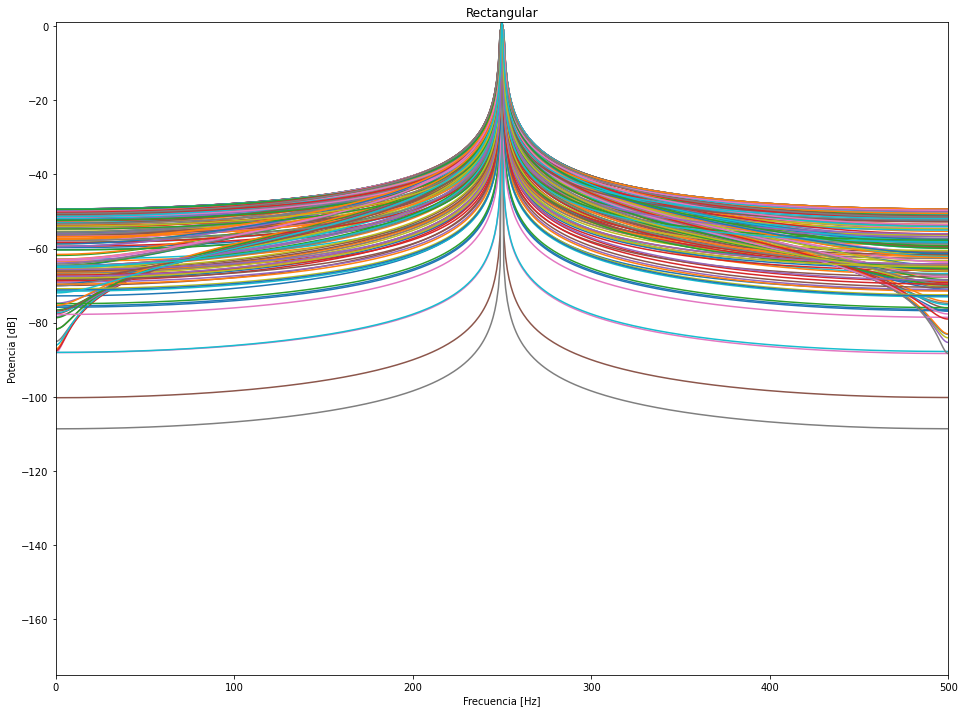

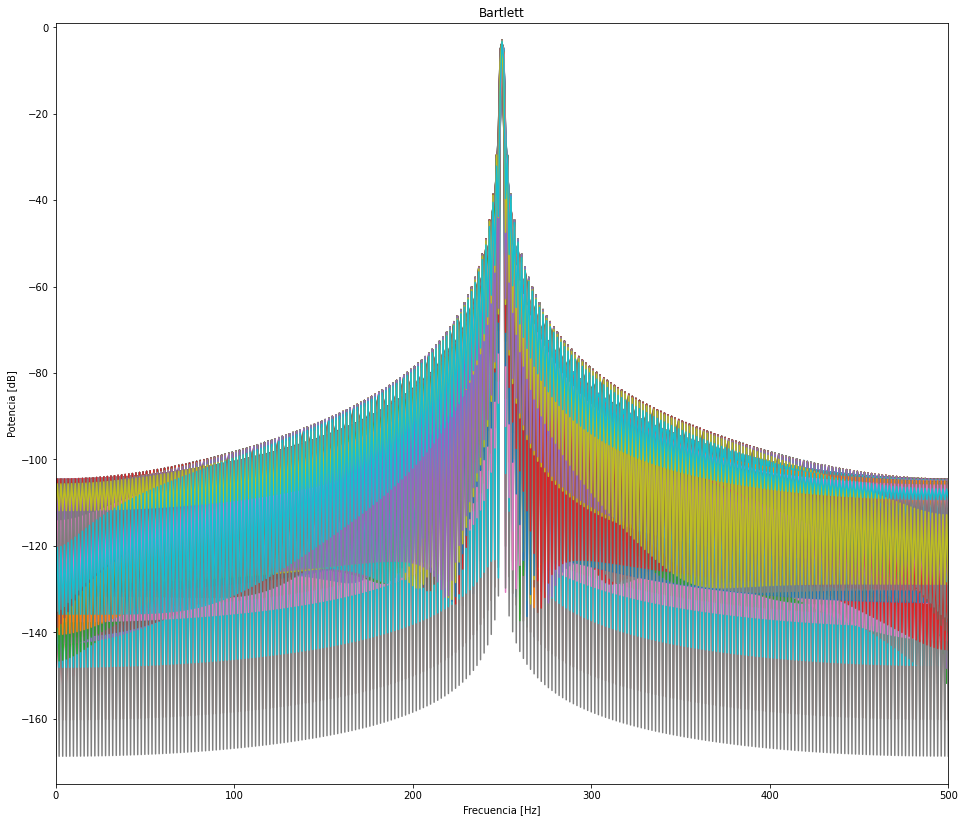

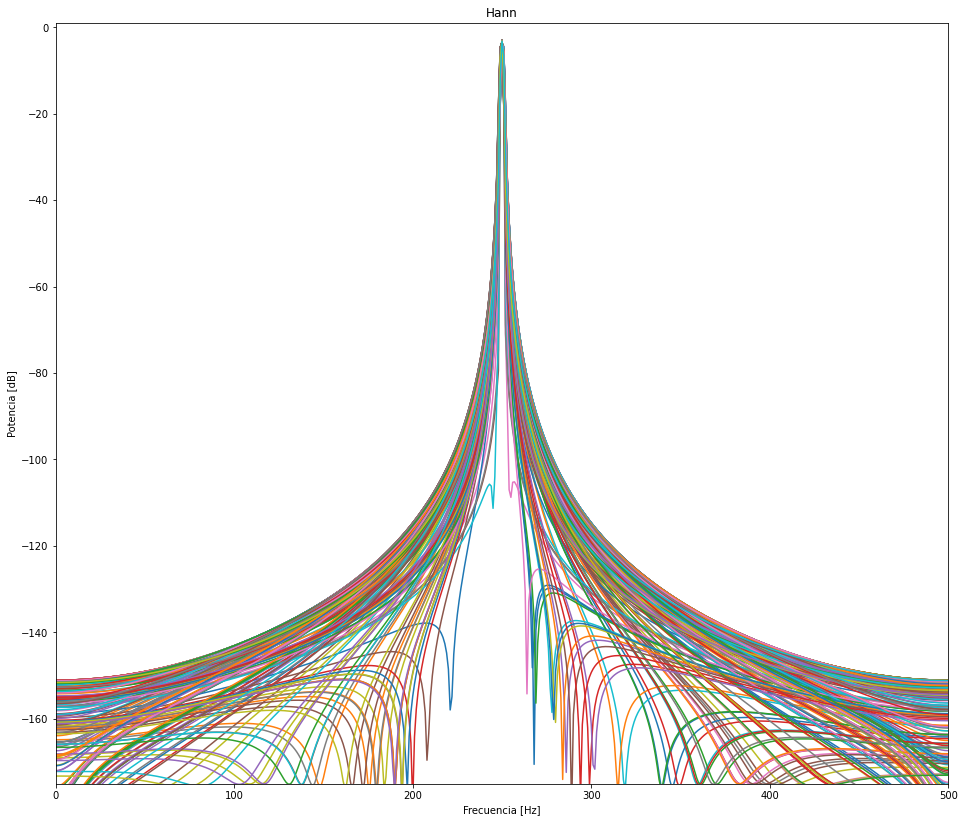

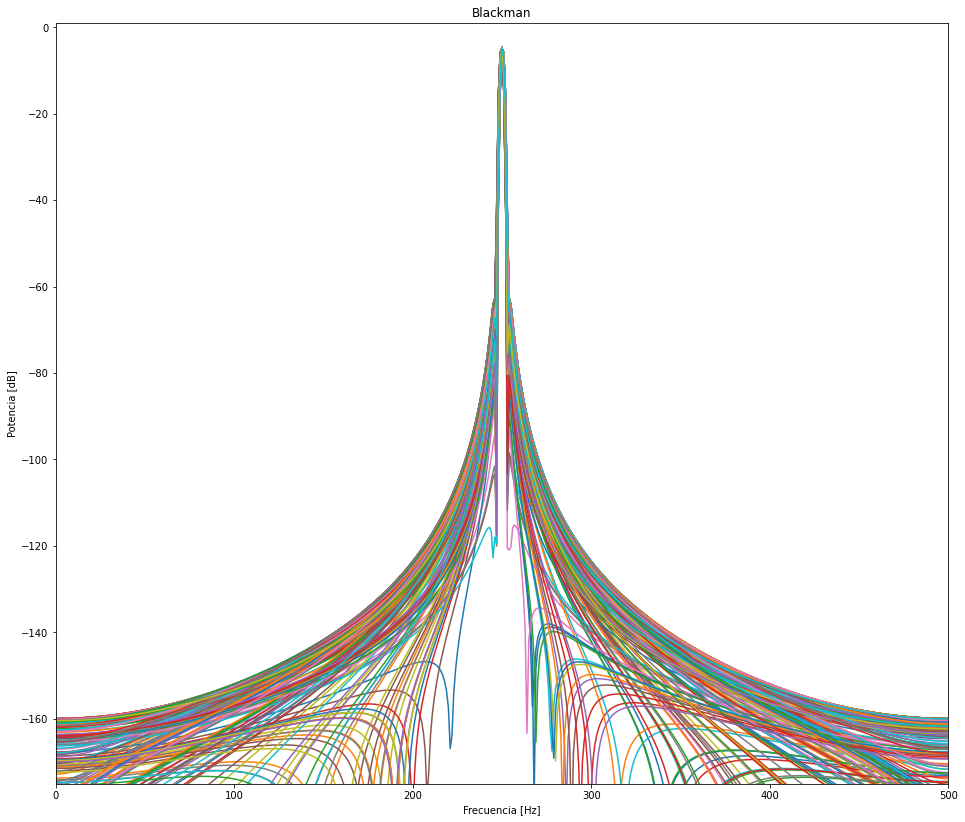

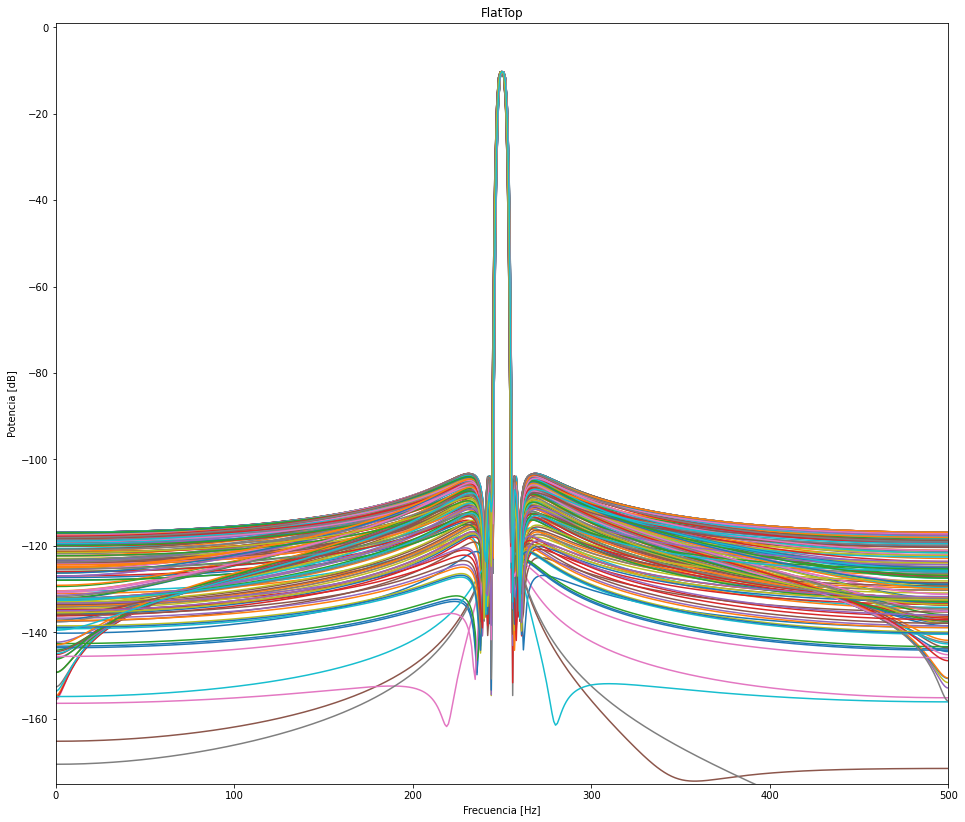

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


fs = 1000 # frecuencia de muestreo
N = 1000   # cantidad de muestras
freq = fs/4
DC = 0
Amplitud = 2

realizaciones = 200
ts = 1/fs
tt = np.linspace(0, (N-1)*ts, N)

## reshape para no tener dimension 0
Bartlett    = sig.windows.bartlett(N).reshape(N,1)
Hann        = sig.windows.hann(N).reshape(N,1)
Blackman    = sig.windows.blackman(N).reshape(N,1)              
FlatTop     = sig.windows.flattop(N).reshape(N,1)

# funciones = np.arange(realizaciones*N).reshape(realizaciones, N)

noise = (np.random.rand(1,realizaciones) - 0.5)  #random = [-1:1] si restamos 0.5 --> ruido = [-1/2 ; 1/2]

tt = np.linspace(0, (N-1)*ts, N).reshape((N,1))
Omega = (np.pi/2 + noise * ((np.pi*2/N)))*fs*tt

# aplico las ventanas a la senoidal
XX_sin_rect = np.sin(Omega)*Amplitud
XX_sin_Bartlett = XX_sin_rect*Bartlett
XX_sin_Hann = XX_sin_rect*Hann
XX_sin_Blackman = XX_sin_rect*Blackman
XX_sin_FlatTop = XX_sin_rect*FlatTop

# realizo la fft de las señales
XX_rect = np.fft.fft(XX_sin_rect, axis = 0)/XX_sin_rect.shape[0]
XX_Bart = np.fft.fft(XX_sin_Bartlett, axis = 0)/XX_sin_Bartlett.shape[0]
XX_Hann = np.fft.fft(XX_sin_Hann, axis = 0)/XX_sin_Hann.shape[0]
XX_Black = np.fft.fft(XX_sin_Blackman, axis = 0)/XX_sin_Blackman.shape[0]
XX_Flat = np.fft.fft(XX_sin_FlatTop, axis = 0)/XX_sin_FlatTop.shape[0]

ff = np.arange(0, fs, fs/N)
bfrec = ff<= fs/2

plt.figure(1)
plt.gcf().set_size_inches(16, 12)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_rect[ff <= fs/2 , :])**2))
plt.title("Rectangular")
plt.ylim([-175, 1])
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure(2)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_Bart[ff <= fs/2 , :])**2))
plt.ylim([-175, 1])
plt.title("Bartlett")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure(3)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_Hann[ff <= fs/2 , :])**2))
plt.ylim([-175, 1])
plt.title("Hann")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure(4)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_Black[ff <= fs/2 , :])**2))
plt.ylim([-175, 1])
plt.title("Blackman")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure(5)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_Flat[ff <= fs/2 , :])**2))
plt.ylim([-175, 1])
plt.title("FlatTop")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.autoscale(enable=True, axis='x', tight=True)


De igual manera, podemos la forma de las señales en el dominio lineal (no dB). Veremos como la energia se encuentra desparramada en las frecuencias cercana a $\dfrac{f_s}{4}$ a causa del ruido blanco aplicado.
Notar ademas que el valor de las amplitudes varía de acuerdo a la ventana aplicada.

Text(0, 0.5, 'Amplitud')

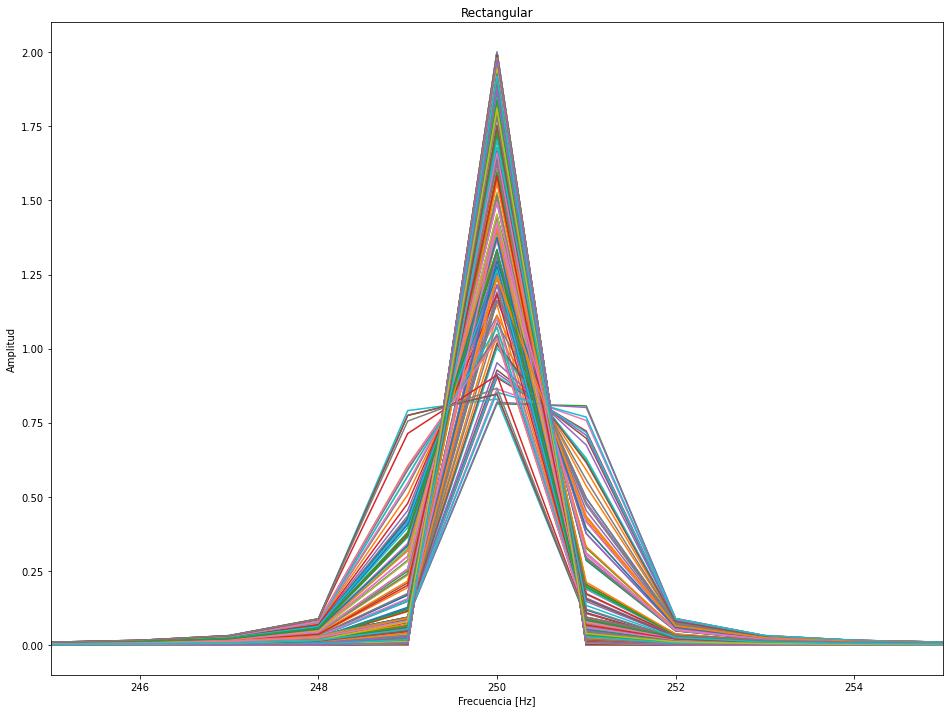

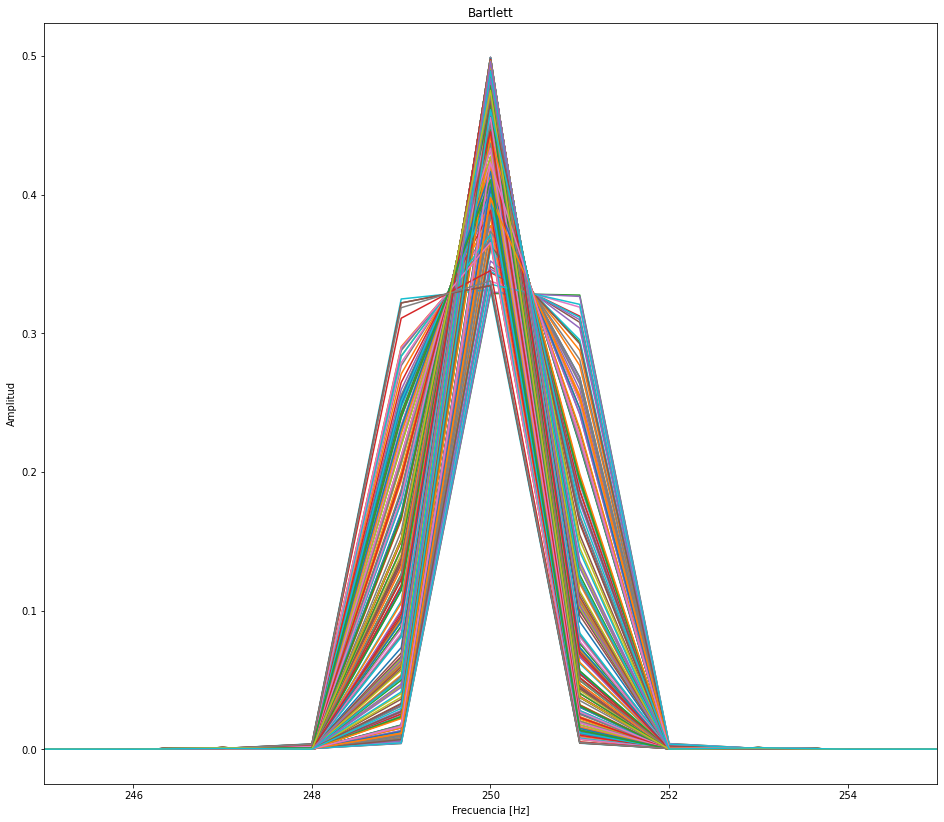

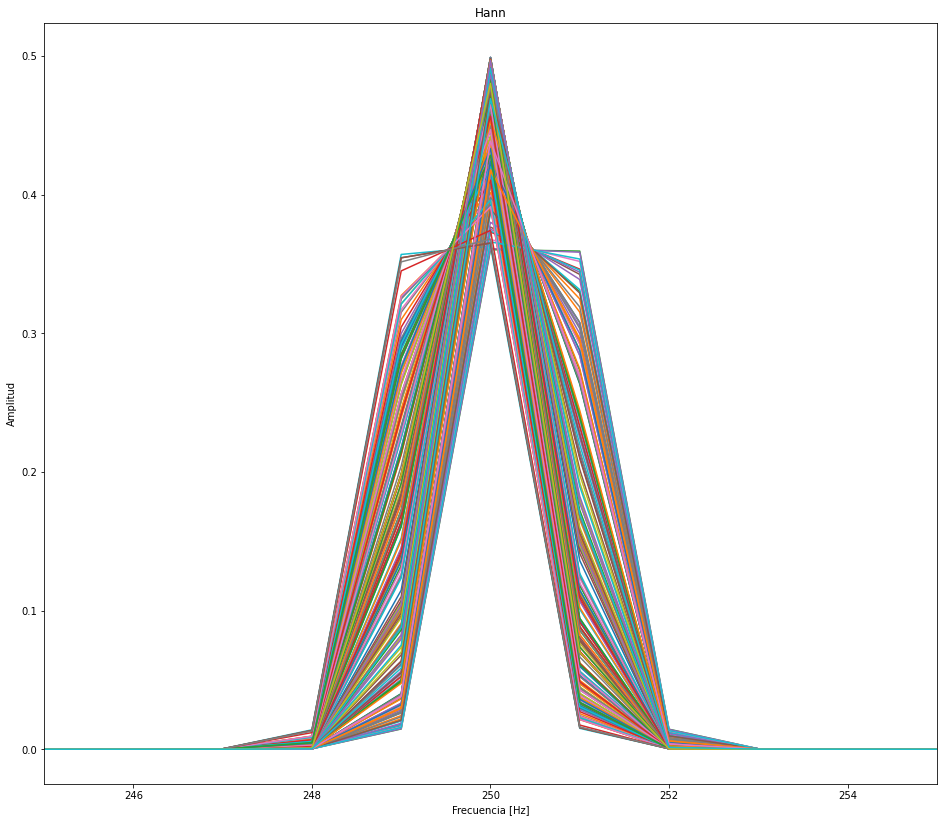

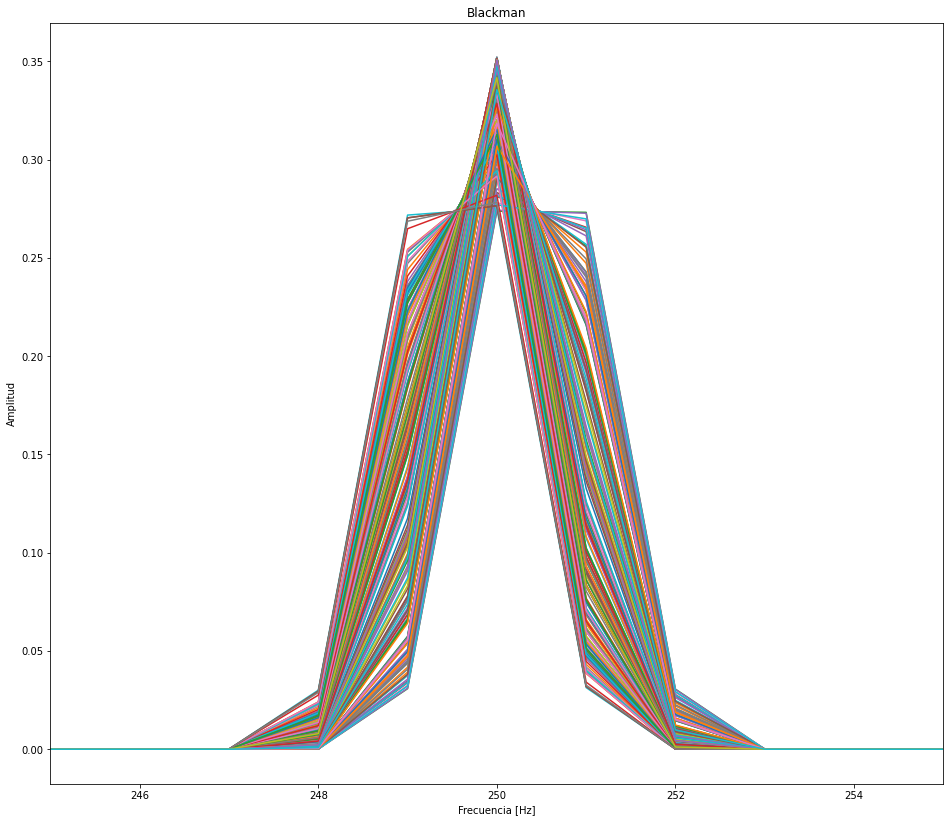

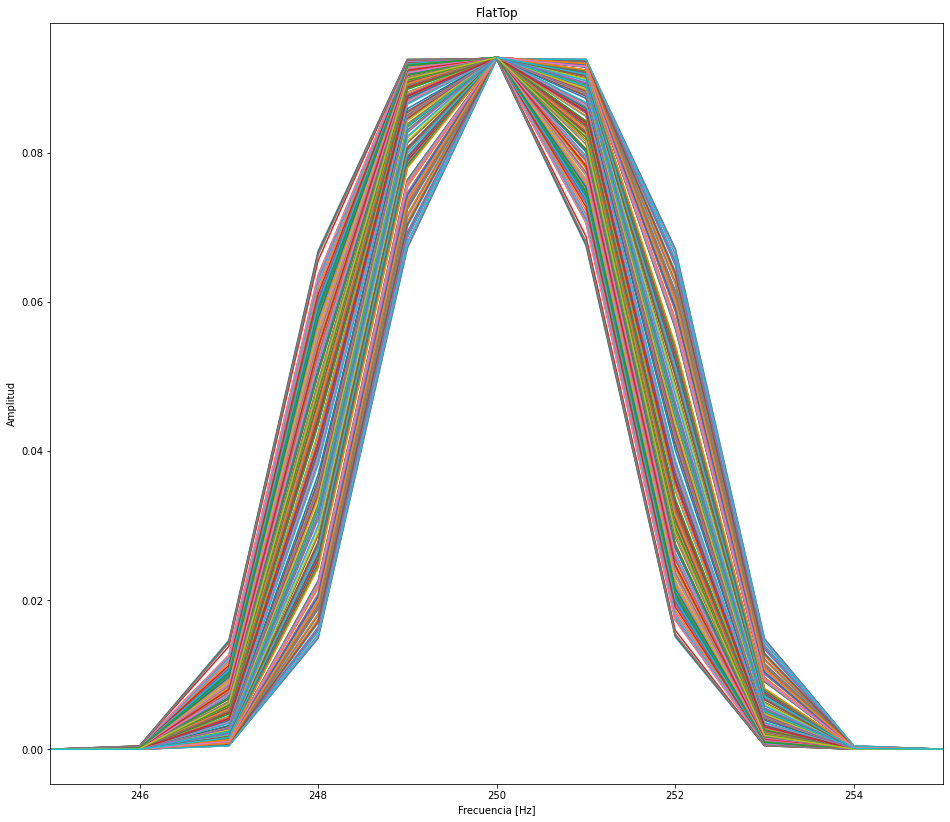

In [2]:
x_min = 245
x_max = 255

plt.figure(1)
plt.gcf().set_size_inches(16, 12)
plt.plot(ff[ff <= fs/2],(2*np.abs(XX_rect[ff <= fs/2 , :])**2))
plt.xlim([x_min,x_max])
plt.title("Rectangular")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.figure(2)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],(2*np.abs(XX_Bart[ff <= fs/2 , :])**2))
plt.xlim([x_min,x_max])
plt.title("Bartlett")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.figure(3)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],(2*np.abs(XX_Hann[ff <= fs/2 , :])**2))
plt.xlim([x_min,x_max])
plt.title("Hann")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.figure(4)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],(2*np.abs(XX_Black[ff <= fs/2 , :])**2))
plt.xlim([x_min,x_max])
plt.title("Blackman")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")


plt.figure(5)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],(2*np.abs(XX_Flat[ff <= fs/2 , :])**2))
plt.xlim([x_min,x_max])
plt.title("FlatTop")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

### Histogramas

#### 3.a)
Estimaremos las amplitudes de las señales de entrada mediante dos diferentes métodos. Luego analizaremos el histograma de cada uno de ellos.

**Metodo "Slice"**

Procederemos a extraer un slice de las señales para una frecuencia $\Omega_0 = \dfrac{f_s}{4}$. 

**Metodo "Integral"**

Procederemos a tratar de "juntar" esa energia desparramada mediante el calculo de su potencia. Definimos un rango de N bins de interes y realizamos una "integral" en esa zona seleccionada. Luego despejamos de la formula el valor de la amplitud estimada.

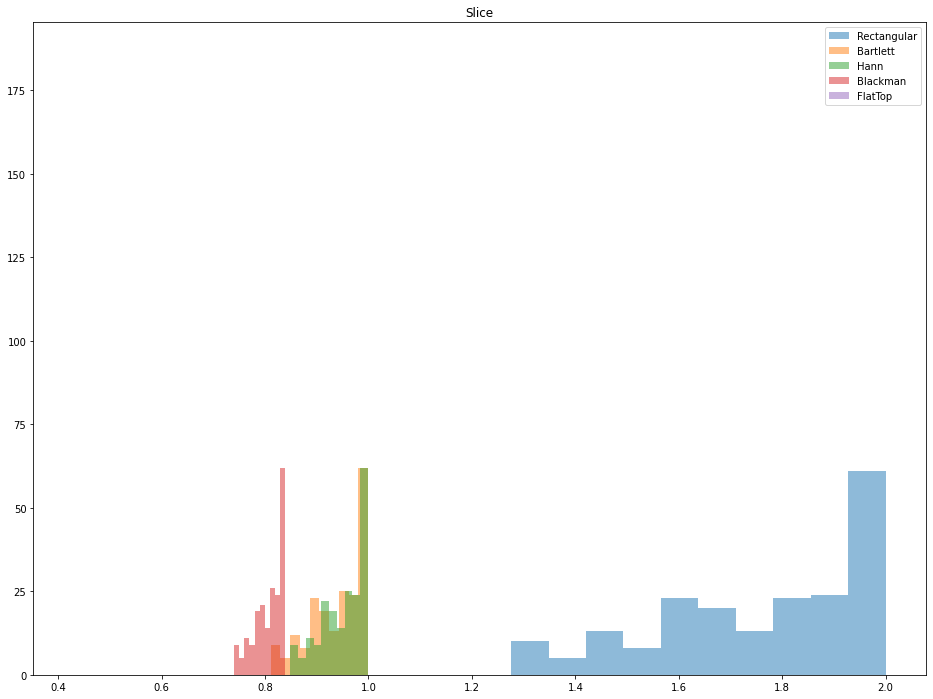

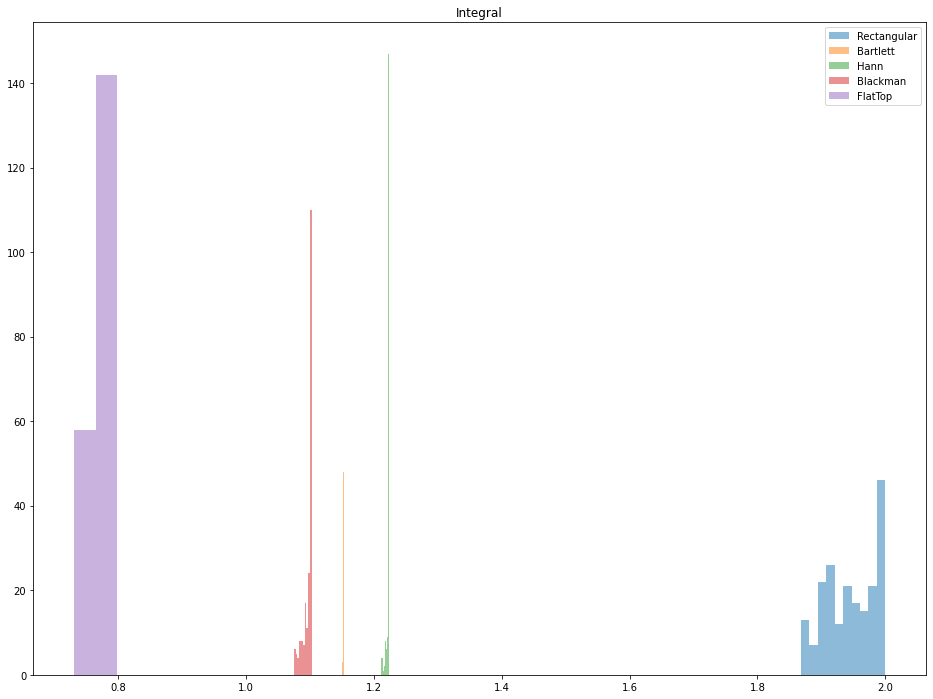

In [3]:
Wbins = 2
#rectangular
Amplitud_Slice_Rect = 2*np.abs(XX_rect[250 , :]) # nos quedamos con una feta y obtemos la amplitud
Densidad_Potencia_rect = 2*np.abs(XX_rect)**2
sub_matriz_rect = Densidad_Potencia_rect[250-Wbins:250+Wbins, :]
Potencia_estimada_rect = np.sum(sub_matriz_rect, axis = 0)
Amplitud_Integral_Rect = np.sqrt(2*Potencia_estimada_rect)

#Bartlett
Amplitud_Slice_Bart = 2*np.abs(XX_Bart[250 , :])
Densidad_Potencia_Bart = 2*np.abs(XX_Bart)**2
sub_matriz_Bart = Densidad_Potencia_Bart[250-Wbins:250+Wbins, :]
Potencia_estimada_Bart = np.sum(sub_matriz_Bart, axis = 0)
Amplitud_Integral_Bart = np.sqrt(2*Potencia_estimada_Bart)

#Hann
Amplitud_Slice_Hann = 2*np.abs(XX_Hann[250 , :])
Densidad_Potencia_Hann = 2*np.abs(XX_Hann)**2
sub_matriz_Hann = Densidad_Potencia_Hann[250-Wbins:250+Wbins, :]
Potencia_estimada_Hann = np.sum(sub_matriz_Hann, axis = 0)
Amplitud_Integral_Hann = np.sqrt(2*Potencia_estimada_Hann)

#BlackMan
Amplitud_Slice_Black = 2*np.abs(XX_Black[250 , :])
Densidad_Potencia_Black = 2*np.abs(XX_Black)**2
sub_matriz_Black = Densidad_Potencia_Black[250-Wbins:250+Wbins, :]
Potencia_estimada_Black = np.sum(sub_matriz_Black, axis = 0)
Amplitud_Integral_Black = np.sqrt(2*Potencia_estimada_Black)

#FlatTop
Amplitud_Slice_Flat = 2*np.abs(XX_Flat[250 , :])
Densidad_Potencia_Flat = 2*np.abs(XX_Flat)**2
sub_matriz_Flat = Densidad_Potencia_Flat[250-Wbins:250+Wbins, :]
Potencia_estimada_Flat = np.sum(sub_matriz_Flat, axis = 0)
Amplitud_Integral_Flat = np.sqrt(2*Potencia_estimada_Flat)

# vstack concatena verticalmente
Estimadores_rect = np.vstack([Amplitud_Slice_Rect, Amplitud_Integral_Rect]).transpose()
Estimadores_Bart = np.vstack([Amplitud_Slice_Bart, Amplitud_Integral_Bart]).transpose()
Estimadores_Hann = np.vstack([Amplitud_Slice_Hann, Amplitud_Integral_Hann]).transpose()
Estimadores_Black = np.vstack([Amplitud_Slice_Black, Amplitud_Integral_Black]).transpose()
Estimadores_Flat = np.vstack([Amplitud_Slice_Flat, Amplitud_Integral_Flat]).transpose()

# rectangular
Medianas_Rect = np.median(Estimadores_rect, axis = 0)
Sesgo_Rect = np.median(Estimadores_rect, axis = 0) - Amplitud
Varianza_Rect = np.mean((Estimadores_rect - Medianas_Rect)**2, axis = 0)

# Bartlett
Medianas_Bart = np.median(Estimadores_Bart, axis = 0)
Sesgo_Bart = np.median(Estimadores_Bart, axis = 0) - Amplitud
Varianza_Bart = np.mean((Estimadores_Bart - Medianas_Bart)**2, axis = 0)

# Hann
Medianas_Hann = np.median(Estimadores_Hann, axis = 0)
Sesgo_Hann = np.median(Estimadores_Hann, axis = 0) - Amplitud
Varianza_Hann = np.mean((Estimadores_Hann - Medianas_Hann)**2, axis = 0)

# Blackman
Medianas_Black = np.median(Estimadores_Black, axis = 0)
Sesgo_Black = np.median(Estimadores_Black, axis = 0) - Amplitud
Varianza_Black = np.mean((Estimadores_Black - Medianas_Black)**2, axis = 0)

#FlatTop
Medianas_Flat = np.median(Estimadores_Flat, axis = 0)
Sesgo_Flat = np.median(Estimadores_Flat, axis = 0) - Amplitud
Varianza_Flat = np.mean((Estimadores_Flat - Medianas_Flat)**2, axis = 0)

#Agrupo por estimador
Est_Slice = np.vstack([Amplitud_Slice_Rect, Amplitud_Slice_Bart,Amplitud_Slice_Hann,Amplitud_Slice_Black, Amplitud_Slice_Flat]).transpose()
Est_integral = np.vstack([Amplitud_Integral_Rect, Amplitud_Integral_Bart, Amplitud_Integral_Hann, Amplitud_Integral_Black, Amplitud_Integral_Flat]).transpose()

# Histogramas
# plt.clf()
# plt.figure(1)
# plt.title("Slice")
# kwargs = dict(alpha=0.5,bins = 10, density=False, stacked=True)
# kwargs_2 = dict(alpha=0.5, bins = 2,density=False, stacked=True)
# plt.hist(Est_Slice[:,0],**kwargs, label = "Rectangular")
# plt.hist(Est_Slice[:,1],**kwargs, label = "Bartlett")
# plt.hist(Est_Slice[:,2],**kwargs, label = "Hann")
# plt.hist(Est_Slice[:,3],**kwargs, label = "Blackman")
# plt.hist(Est_Slice[:,4],**kwargs_2, label = "FlatTop")
# plt.legend()

plt.figure(1)
plt.gcf().set_size_inches(16, 12)
plt.title("Slice")
kwargs = dict(alpha=0.5,bins = 10, density=False, stacked=True)
kwargs_2 = dict(alpha=0.5, bins = 2,density=False, stacked=True)
plt.hist(Est_Slice[:,0],**kwargs, label = "Rectangular")
plt.hist(Est_Slice[:,1],**kwargs, label = "Bartlett")
plt.hist(Est_Slice[:,2],**kwargs, label = "Hann")
plt.hist(Est_Slice[:,3],**kwargs, label = "Blackman")
plt.hist(Est_Slice[:,4],**kwargs_2, label = "FlatTop")
plt.legend()

plt.figure(2)
plt.gcf().set_size_inches(16, 12)
plt.title("Integral")
kwargs = dict(alpha=0.5,bins = 10, density=False, stacked=True)
kwargs_2 = dict(alpha=0.5, bins = 2,density=False, stacked=True)
plt.hist(Est_integral[:,0],**kwargs, label = "Rectangular")
plt.hist(Est_integral[:,1],**kwargs, label = "Bartlett")
plt.hist(Est_integral[:,2],**kwargs, label = "Hann")
plt.hist(Est_integral[:,3],**kwargs, label = "Blackman")
plt.hist(Est_integral[:,4],**kwargs_2, label = "FlatTop")
plt.legend()

NOTAR que FlatTop tiene menor Varianza pero mayor Sesgo pero el Sesgo se puede corregir (Error Sistematico)

Analicemos ambos casos:

**Metodo Slice**

Podemos ver mediante su histograma como el estimador de la amplitud de las señales que no tiene aplicada ningun tipo de ventana (Rectangular) posee una gran **varianza/dispersión**. Esto se debe a que gran parte de de su energía se encuentra dispersa en los bins cercanos, por lo que la amplitud sera dificil de estimar.

Tambien notamos que al aplicar las distintas ventanas la dispersión se fue reduciendo, siendo el mejor en esto la ventana del tipo FlatTop. Logramos reducir la varianza a costa de incrementar el sesgo; Estamos estimando una amplitud de 0.43 cuando las senoidales de entrada tienen un amplitud de 2. Sin embargo este tipo de error lo podemos corregir facilmente, no asi el problema de una alta varianza.

**Metodo Integral**

Notamos que al utilizar este metodo, el estamador de ventana cuadrada redujo considerablemente su dispersión. Tambien podemos apreciar que, en general, las demas ventanas redujeron la varianza del estimador.

### Sesgo y varianza

#### 3.b)

Procederemos a calcular el sesgo y la varianza de los estimadores mencionados anteriormente
#### Caso Slice

In [4]:
import pandas
from pandas import DataFrame
from IPython.display import HTML
#                      SESGO,             VARIANZA 
tus_resultados_slice = [ 
                   [Sesgo_Rect[0], Varianza_Rect[0]], # <-- Rectangular  Slice 
                   [Sesgo_Bart[0], Varianza_Bart[0]], # <-- Bartlett     Slice
                   [Sesgo_Hann[0], Varianza_Hann[0]], # <-- Hann         Slice
                   [Sesgo_Black[0], Varianza_Black[0]], # <-- Blackman     Slice
                   [Sesgo_Flat[0], Varianza_Flat[0]], # <-- FlatTop      Slice
                 ]
df_slice = DataFrame(tus_resultados_slice, columns=['Sesgo', 'Varianza'],
               index=[  
                        'Rectangular Slice',
                        'Bartlett Slice',
                        'Hann Slice',
                        'Blackman Slice',
                        'Flat-top Slice',
                     ])
HTML(df_slice.to_html(col_space = '300px', justify = 'center'))

,Sesgo,Varianza
Rectangular Slice,-0.192741,4.475030e-02
Bartlett Slice,-1.049170,2.988267e-03
Hann Slice,-1.038932,1.894567e-03
Blackman Slice,-1.185703,8.240206e-04
Flat-top Slice,-1.569224,1.556105e-08


Al tomar solo una "feta" de las señales, podemos ver como la ventana de FlatTop es la que nos da una menor varianza, con un mayor sesgo.

#### Caso Integral

In [5]:
tus_resultados_intgr = [ 
                       [Sesgo_Flat[1], Varianza_Flat[1]], # <-- FlatTop      Integral
                       [Sesgo_Rect[1], Varianza_Rect[1]], # <-- Rectangular  Integral
                       [Sesgo_Black[1], Varianza_Black[1]], # <-- Blackman     Integral
                       [Sesgo_Hann[1], Varianza_Hann[1]], # <-- Hann         Integral
                       [Sesgo_Bart[1], Varianza_Bart[1]], # <-- Bartlett     Integral

                 ]
df_intgr = DataFrame(tus_resultados_intgr, columns=['Sesgo', 'Varianza'],
               index=[  
                        'Flat-top Integral',
                        'Rectangular Integral',
                        'Blackman Integral',
                        'Hann Integral' ,       
                        'Bartlett Integral'

                     ])

HTML(df_intgr.to_html(col_space = '300px', justify = 'center'))

,Sesgo,Varianza
Flat-top Integral,-1.216942,4.482741e-04
Rectangular Integral,-0.054064,1.593976e-03
Blackman Integral,-0.899103,6.642672e-05
Hann Integral,-0.776306,8.458512e-06
Bartlett Integral,-0.847771,2.698839e-07


Procemos a ordendarlos mediante el valor de su varianza de forma decreciente.
Como habiamos notado anteriormente en los histogramas, al utilzar el metodo de integración se logra una reducción de varianza en la mayoria de los estimadores (menos FlatTop).

Conclusion: la mejor ventana es FlatTop porque es la que menor Varianza tiene (factor principal en utilizacion de ventanas). Como el efecto de la Ventana sobre el Sesgo es conocido se puede corregir como un Error Sistematico, por lo que deja de ser un problema